In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Real Multiplexes

## Preprocessing

### Loading and concatenating dataframes

In [2]:
# Without intercept
metadata = {
    "PROJECT_ID": "EMB_ex27",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v3.1",
    "DATE": "20230228"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df_nfi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# With intercept
metadata = {
    "PROJECT_ID": "EMB_ex27",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v3.1-FI",
    "DATE": "20230301"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df_fi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

df_nfi["fit_intercept"] = [False] * len(df_nfi)
df_fi["fit_intercept"] = [True] * len(df_fi)

df = pd.concat([df_nfi, df_fi])
df = df.reset_index()

In [3]:
# MEC reference - D
# Mistake with label, don't worry about DC in load statement
with open("../../results/MEC/D-arxiv.pkl", "rb") as _fh:
    arxiv_D = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/D-drosophila.pkl", "rb") as _fh:
    drosophila_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-celegans.pkl", "rb") as _fh:
    celegans_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-london.pkl", "rb") as _fh:
    london_D = pickle.load(_fh)[('DC', 1, 2)]

In [4]:
# MEC reference - DC
with open("../../results/MEC/figure4a_data.pk", "rb") as _fh:
    arxiv_DC = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/figure4b_data.pk", "rb") as _fh:
    drosophila_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4c_data.pk", "rb") as _fh:
    celegans_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4d_data.pk", "rb") as _fh:
    london_DC = pickle.load(_fh)[('DC', 1, 2)]

### Pruning

In [5]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0", "accuracy", "aupr"])

# Drop rows with infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

### Reindexing and renaming

In [6]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [7]:
df.describe()

,index,alpha,beta,theta,auroc,process_time,wall_time
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,400.000000,1.250000,3.000000,0.500000,0.863524,0.079184,0.079185
std,231.016727,0.433163,1.732653,0.258289,0.140276,0.078821,0.078822
min,1.000000,1.000000,2.000000,0.100000,0.526297,0.003673,0.003674
25%,200.500000,1.000000,2.000000,0.300000,0.703006,0.006975,0.006975
50%,400.000000,1.000000,2.000000,0.500000,0.940944,0.063002,0.063002
75%,599.500000,1.250000,3.000000,0.700000,0.972476,0.151987,0.151988
max,799.000000,2.000000,6.000000,0.900000,1.000000,0.332178,0.332179


## Analysis

### Prior MEC classifiers

Text(0.5, 1.0, 'Reproduce Naive Bayes D results')

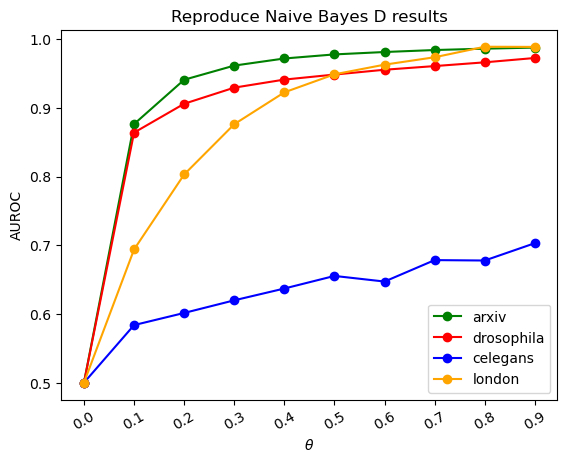

In [8]:
plt.figure()

plt.plot(arxiv_D[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_D[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_D[2], label="celegans", color="blue", marker="o")
plt.plot(london_D[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes D results")

Text(0.5, 1.0, 'Reproduce Naive Bayes DC results')

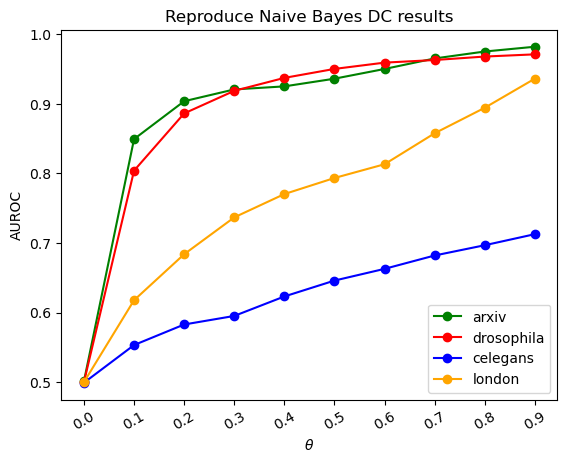

In [9]:
plt.figure()

plt.plot(arxiv_DC[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_DC[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_DC[2], label="celegans", color="blue", marker="o")
plt.plot(london_DC[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes DC results")

### Configuration distances

<Figure size 640x480 with 0 Axes>

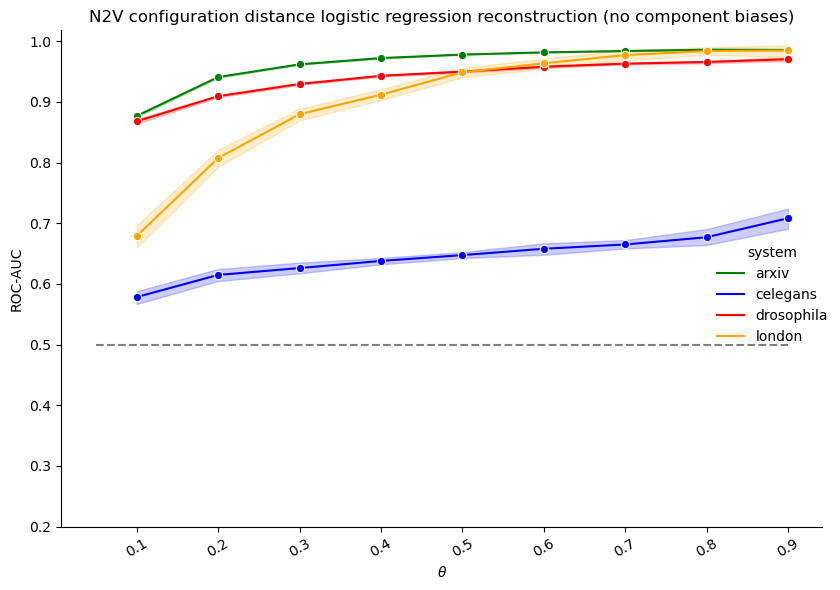

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.query("fit_intercept == False"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

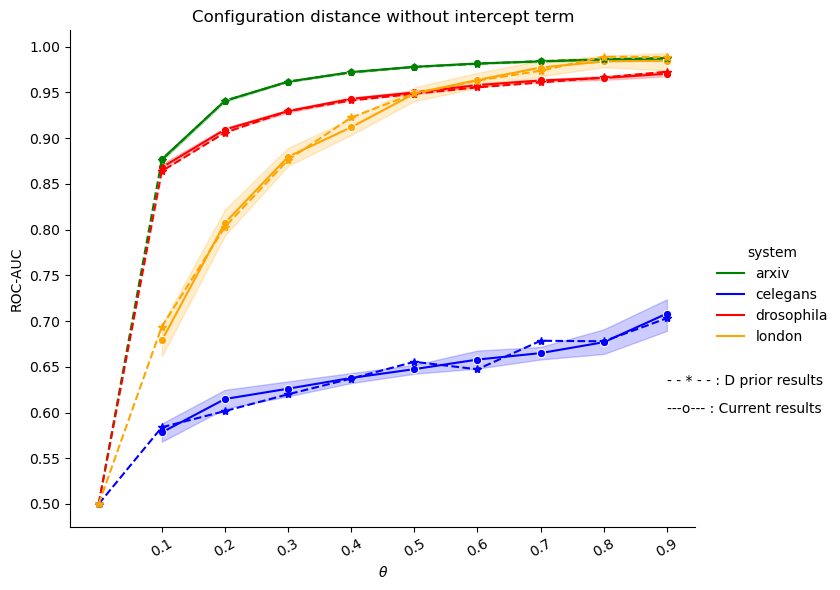

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df.query("fit_intercept == False"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0, 0.9, 10)]
plt.plot(ticks_, arxiv_D[2], label="arxiv", color="green", marker="*", linestyle="--")
plt.plot(ticks_, drosophila_D[2], label="drosophila", color="red", marker="*", linestyle="--")
plt.plot(ticks_, celegans_D[2], label="celegans", color="blue", marker="*", linestyle="--")
plt.plot(ticks_, london_D[2], label="london", color="orange", marker="*", linestyle="--")
# plt.plot(ticks_, arxiv_DC[2], label="arxiv", color="green", marker="x", linestyle="--")
# plt.plot(ticks_, drosophila_DC[2], label="drosophila", color="red", marker="x", linestyle="--")
# plt.plot(ticks_, celegans_DC[2], label="celegans", color="blue", marker="x", linestyle="--")
# plt.plot(ticks_, london_DC[2], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
# plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.text(0.9, 0.63, "- - * - - : D prior results")
plt.text(0.9, 0.6, "---o--- : Current results")
plt.title("Configuration distance without intercept term")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance_MEC-baseline.png", facecolor="white", transparent=False)

### Configuration distances with intercept

<Figure size 640x480 with 0 Axes>

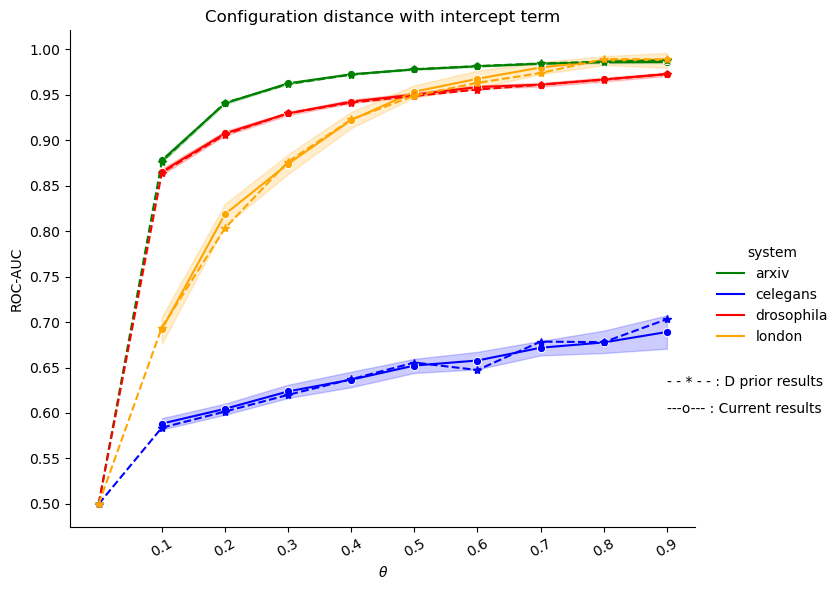

In [12]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df.query("fit_intercept == True"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0, 0.9, 10)]
plt.plot(ticks_, arxiv_D[2], label="arxiv", color="green", marker="*", linestyle="--")
plt.plot(ticks_, drosophila_D[2], label="drosophila", color="red", marker="*", linestyle="--")
plt.plot(ticks_, celegans_D[2], label="celegans", color="blue", marker="*", linestyle="--")
plt.plot(ticks_, london_D[2], label="london", color="orange", marker="*", linestyle="--")
# plt.plot(ticks_, arxiv_DC[2], label="arxiv", color="green", marker="x", linestyle="--")
# plt.plot(ticks_, drosophila_DC[2], label="drosophila", color="red", marker="x", linestyle="--")
# plt.plot(ticks_, celegans_DC[2], label="celegans", color="blue", marker="x", linestyle="--")
# plt.plot(ticks_, london_DC[2], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
# plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.text(0.9, 0.63, "- - * - - : D prior results")
plt.text(0.9, 0.6, "---o--- : Current results")
plt.title("Configuration distance with intercept term")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-FI-configuration-distance_MEC-baseline.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

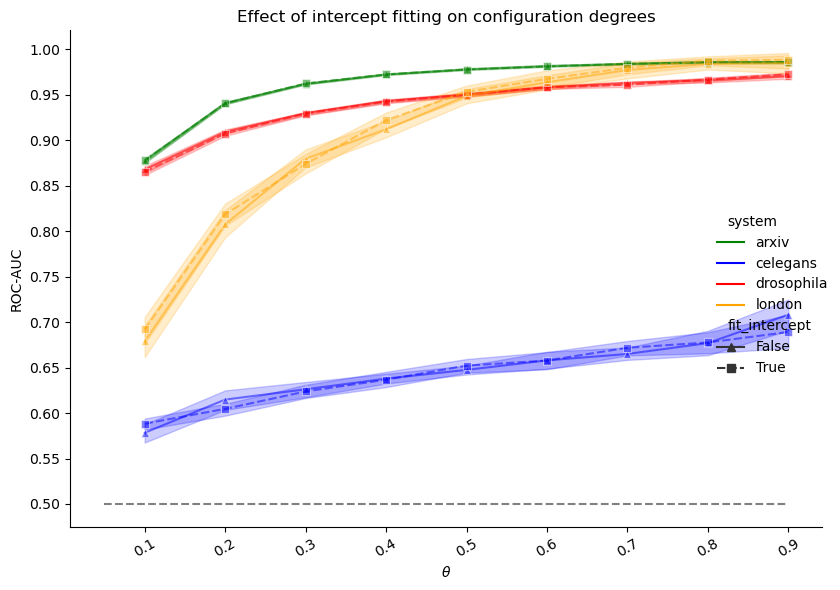

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    style="fit_intercept",
    markers=["^", "s"],
    alpha=0.5,
    height=6, aspect=1.2,
    legend=True
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")

# Figure-level attributes
plt.title("Effect of intercept fitting on configuration degrees")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg_FI-effect.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

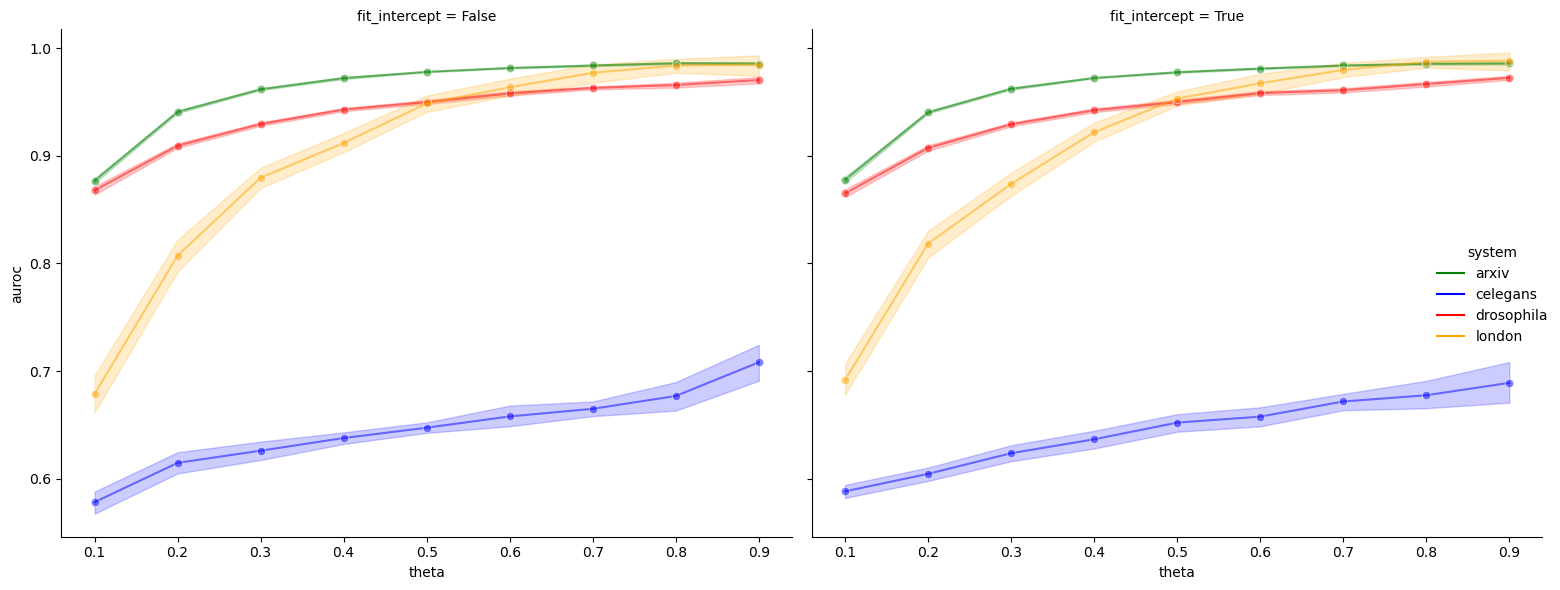

In [14]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    col="fit_intercept",
    marker="o",
    alpha=0.5,
    height=6, aspect=1.2,
    legend=True
)

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/.png", facecolor="white", transparent=False)

# Synthetic Multiplexes

## Preprocessing

### Loading and cocatenating

In [2]:
# Without intercept
metadata_S = {
    "PROJECT_ID": "EMB_ex27-S",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230304"
}
TAG_S = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_S)

df_S_nfi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_S}.csv")

# With intercept
metadata_S = {
    "PROJECT_ID": "EMB_ex27-S",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0-FI",
    "DATE": "20230304"
}
TAG_S = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_S)

df_S_fi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_S}.csv")

df_S_nfi["fit_intercept"] = [False] * len(df_S_nfi)
df_S_fi["fit_intercept"] = [True] * len(df_S_fi)

df_S = pd.concat([df_S_nfi, df_S_fi])

### Pruning

In [3]:
# Drop dummy index
df_S.drop(columns=["Unnamed: 0"], inplace=True)

# Drop extraneous data
df_S.drop(columns=["N", "process_time", "wall_time", "accuracy", "aupr"], inplace=True)

# Drop rows with nans
df_S.dropna(how="any", inplace=True)

### Transforming

In [4]:
# Proxies for layer imbalance
df_S["k_ratio"] = df_S.k1 / df_S.k2
df_S["size_ratio"] = df_S.size_G / df_S.size_H
# df_S["remnant_size_ratio"] = df_S.size_R_G / df_S.size_R_H
df_S["coef_ratio"] = df_S.intercept / df_S.coefs

### Reindexing and renaming

In [5]:
df_S = df_S.reset_index()

In [19]:
df_S.head()

,index,k1,k2,theta,intercept,coefs,auroc,size_G,size_H,avg_G,avg_H,avg_R_G,avg_R_H,fit_intercept,k_ratio,size_ratio,coef_ratio
0,1,5.0,5.0,0.1,0.0,9.481156,0.427386,3273.0,2931.0,6.546,5.862,11.786,11.798,False,1.0,1.116684,0.0
1,2,5.0,5.0,0.2,0.0,10.093324,0.390320,3273.0,2931.0,6.546,5.862,11.164,11.114,False,1.0,1.116684,0.0
2,3,5.0,5.0,0.3,0.0,8.653318,0.357646,3273.0,2931.0,6.546,5.862,10.714,10.364,False,1.0,1.116684,0.0
3,4,5.0,5.0,0.4,0.0,6.865177,0.330531,3273.0,2931.0,6.546,5.862,10.166,9.742,False,1.0,1.116684,0.0
4,5,5.0,5.0,0.5,0.0,5.284949,0.289826,3273.0,2931.0,6.546,5.862,9.494,9.062,False,1.0,1.116684,0.0


## Analysis

### Imbalance

<Figure size 432x288 with 0 Axes>

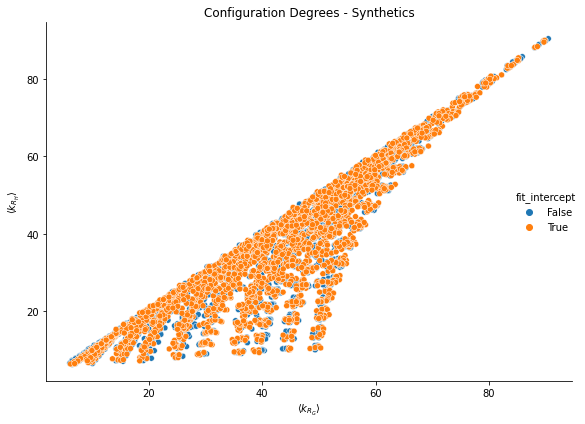

In [6]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_S, kind="scatter",
    x="avg_R_G", y="avg_R_H",
    hue="fit_intercept",
    height=6, aspect=1.2,
)

# Axes configuration
plt.xlabel("$\\langle k_{R_G} \\rangle$")
plt.ylabel("$\\langle k_{R_H} \\rangle$")

# Figure-level attributes
plt.title("Configuration Degrees - Synthetics")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

### Basic performance

<Figure size 432x288 with 0 Axes>

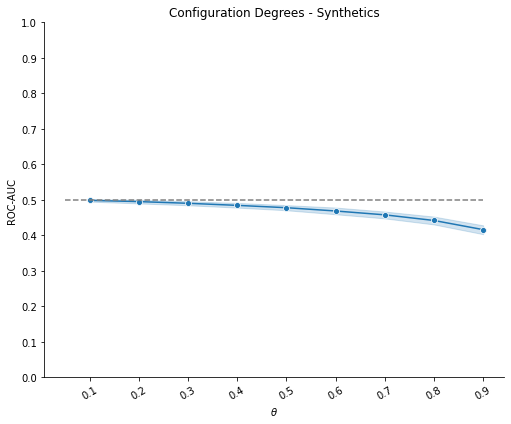

In [7]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_S, kind="line",
    x="theta", y="auroc",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df_S["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration Degrees - Synthetics")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

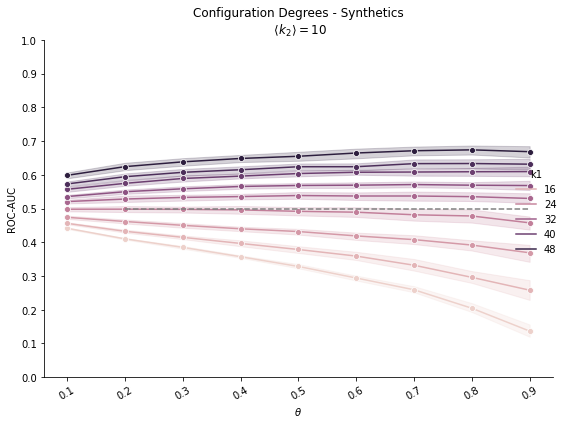

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_S.query("k2 == 10"), kind="line",
    x="theta", y="auroc",
    hue="k1",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.2, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df_S["theta"]) if x > 0],
    rotation=30
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration Degrees - Synthetics\n $\\langle k_2 \\rangle = 10$")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

### Coefficients

<Figure size 432x288 with 0 Axes>

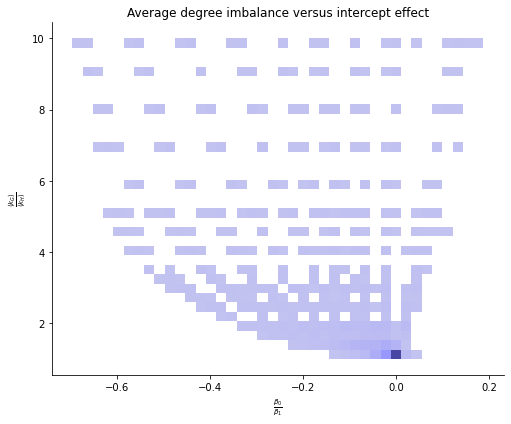

In [9]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.displot(
    data=df_S.query("fit_intercept == True"), kind="hist",
    x="coef_ratio", y="k_ratio",
    color="blue",
    height=6, aspect=1.2,
)

# Axes configuration
plt.xlabel("$\\frac{\\beta_0}{\\beta_1}$")
plt.ylabel("$\\frac{\\langle k_G \\rangle}{\\langle k_H \\rangle}$")

# Figure-level attributes
plt.title("Average degree imbalance versus intercept effect")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

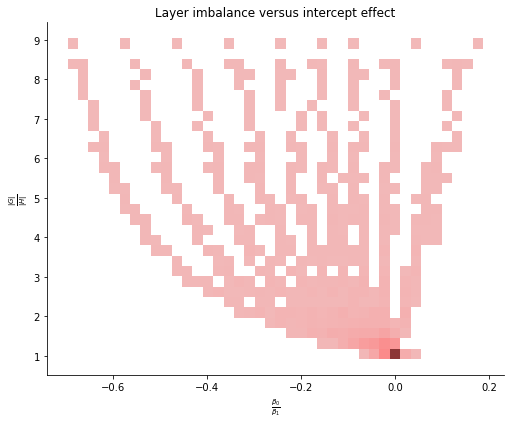

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.displot(
    data=df_S.query("fit_intercept == True"), kind="hist",
    x="coef_ratio", y="size_ratio",
    color="red",
    height=6, aspect=1.2,
)

# Axes configuration
plt.xlabel("$\\frac{\\beta_0}{\\beta_1}$")
plt.ylabel("$\\frac{|G|}{|H|}$")

# Figure-level attributes
plt.title("Layer imbalance versus intercept effect")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 648x432 with 0 Axes>

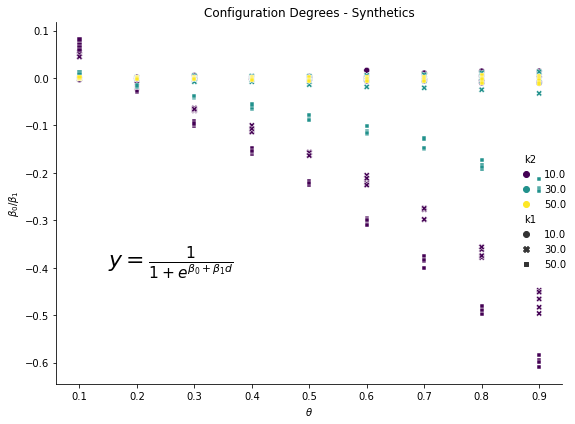

In [41]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(9,6))

# Plotting data
sns.relplot(
    data=df_S.query("(fit_intercept == True) & (k1 % 20 == 10) & (k2 % 20 == 10)"), kind="scatter",
    x="theta", y="coef_ratio",
    hue="k2", palette="viridis",
    style="k1",
    height=6, aspect=1.2,
)

# Axes configuration
plt.xlabel("$\\theta$")
plt.ylabel("$\\beta_0 / \\beta_1$")

# Figure-level attributes
plt.title("Configuration Degrees - Synthetics")
plt.text(0.15, -0.4, "$y = \\frac{1}{1+e^{\\beta_0 + \\beta_1d}} $", fontdict={"size": 22})

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/scatter_coefratio-theta_logreg-configuration-distance.png", facecolor="white", transparent=False)